# Task1: Min-Max Algorithm

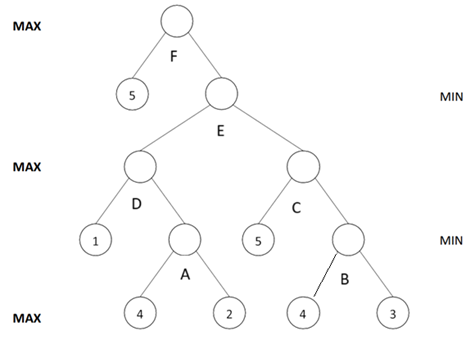

In [1]:
inf = 1000 #set a random max value for infinity that is very large then the max value in tree

# declare a class for Treenode with 2 methods. 1 constructor and 1 to add children
class TreeNode: #Class for tree
    def __init__(self, value, name):  #self is must for class access, value contains tree vale and name
        self.value = value
        self.name = name
        self.children = []  #iniitate a list to store the childs of a node

    def add_child(self, child_node): #method to append child 
        self.children.append(child_node)






In [2]:
# declare a recursive function to perform min max
def min_max(node, level): # function declaration
    if(len(node.children) == 0): #bottom or leaf node
        return node.value # return the node value
    
    if(level): #level 1 is top node and it goes down by -1 value for each child node
        max_val = -inf # initiate max value
        for child in node.children: # loop over each child
            val = min_max(child, 1-level) # recursive call to min_max by reducing the level value by 1
            max_val = max(max_val, val) # compare the 2 values
        node.value = max_val # maximum vaue
        return max_val
    else: #
        min_val = inf
        for child in node.children:
            val = min_max(child, 1-level)
            min_val = min(min_val, val)
        node.value = min_val
        return min_val

In [3]:
# create the tree as in the given task
f = TreeNode(-inf-1, "f")
child1_of_f = TreeNode(5, "child1_of_f")
e = TreeNode(-inf-1, "e")
d = TreeNode(-inf-1, "d")
c = TreeNode(-inf-1, "c")
child1_of_d = TreeNode(1, "child1_of_d")
a = TreeNode(-inf-1, "a")
child1_of_c = TreeNode(5, "child1_of_c")
b = TreeNode(-inf-1, "b")
child1_of_a = TreeNode(4, "child1_of_a")
child2_of_a = TreeNode(2, "child2_of_a")
child1_of_b = TreeNode(4, "child1_of_b")
child2_of_b = TreeNode(3, "child2_of_b")

#connecting nodes to form the tree
f.add_child(child1_of_f)
f.add_child(e)
e.add_child(d)
e.add_child(c)
d.add_child(child1_of_d)
d.add_child(a)
c.add_child(child1_of_c)
c.add_child(b)
a.add_child(child1_of_a)
a.add_child(child2_of_a)
b.add_child(child1_of_b)
b.add_child(child2_of_b)

In [4]:
# perform min max algorithm by passing the top most node name and level

min_max(f, 1)
print('Max Value in the tree after performing min-max algorthim is:', f.value)

Max Value in the tree after performing min-max algorthim is: 5


# Task1d: Min-Max Using Alpha-Beta Pruning

In [5]:
def min_max_ab(node, alpha, beta, level): #min-max algorithm implementation

    print("Start of node:", node.name, node.value, ',', "Value of Alpha & Beta are:", alpha, "&", beta)
    if(len(node.children) == 0): #no child node means this is root node
        return node.value #so simply return the value
    
    if(level): #parity =  1 means this is max node
        max_val = -inf #initialize max val with -inf
        for child in node.children: #iterate over each child and update the max_val
            val = min_max_ab(child, alpha, beta, 1-level) #sending 1-parity as next node will be min node
            max_val = max(max_val, val)
            alpha = max(alpha, val) #update the value of max_val and alpha
            if beta <= alpha: #break when beta <= alpha
                # print("Prune after node", child.name)
                break
        node.value = max_val #assign the node its value
        return max_val
    else: #same as above but for min node
        min_val = inf
        for child in node.children:
            val = min_max_ab(child, alpha, beta, 1-level)
            min_val = min(min_val, val)
            beta = min(beta, val)
            if beta <= alpha:
                # print("Prune after node", child.name)
                break
        node.value = min_val
        print("End of node:", node.name, node.value, ",", "Value of Alpha & Beta are:", alpha, "&", beta)
        return min_val

In [6]:
min_max_ab(f, -inf, inf, 1)
print('Max Value in the tree after performing min-max algorthim using Alpha Beta Pruning is:', f.value)

Start of node: f 5 , Value of Alpha & Beta are: -1000 & 1000
Start of node: child1_of_f 5 , Value of Alpha & Beta are: -1000 & 1000
Start of node: e 2 , Value of Alpha & Beta are: 5 & 1000
Start of node: d 2 , Value of Alpha & Beta are: 5 & 1000
Start of node: child1_of_d 1 , Value of Alpha & Beta are: 5 & 1000
Start of node: a 2 , Value of Alpha & Beta are: 5 & 1000
Start of node: child1_of_a 4 , Value of Alpha & Beta are: 5 & 1000
End of node: a 4 , Value of Alpha & Beta are: 5 & 4
End of node: e 4 , Value of Alpha & Beta are: 5 & 4
Max Value in the tree after performing min-max algorthim using Alpha Beta Pruning is: 5


# Constraint Satisfaction Problem (CSP)

In [33]:
from constraint import Problem

# Create a problem instance
problem = Problem()

# Define constants
services = {
    "RoutinePatientCheckup": {"days": ["Monday", "Tuesday"], "hours": 7},
    "BloodAndTests": {"days": ["Wednesday"], "hours": 4},
    "Surgeries": {"days": ["Thursday"], "hours": 5},
    "RoutineCheckup": {"days": ["Wednesday", "Friday"], "hours": 7},
}

doctors = ["Doctor1", "Doctor2"]
weeks = [1, 2]

# Create variables for each service, day, and week
variables = [] # initialize a list
var_count = 0 # dummy  to find the count of created variables

# loop through each service
for service, details in services.items():
    print("\nService name:", service, "Details", details)

    # loop through each day of the service
    for day in details["days"]:
        # Repeat for 2 weeks
        for week in weeks:
            var = f"{service}_{day}_Week{week}"
            variables.append(var)
            problem.addVariable(var, doctors)
            var_count = var_count + 1 # counter for created variables
            print(f"Variable {var_count} created with name: {var} & value:{doctors}")

# Constraint 1: Equal workload over 2 weeks
def equal_workload(*assignments):
   
    workload = {"Doctor1": 0, "Doctor2": 0} # initialize counter for 2 doctors 
    # Map services and accumulate workload
    
    for var, doctor in zip(variables, assignments):
        # Extract service name from the variable
        service_name = var.split("_")[0]
        workload[doctor] += services[service_name]["hours"]
    return workload["Doctor1"] == workload["Doctor2"]

problem.addConstraint(equal_workload, variables)

# Constraint 2: Routine Patient Checkup handled by one doctor
for week in weeks:
    for day in services["RoutinePatientCheckup"]["days"]:
        var = f"RoutinePatientCheckup_{day}_Week{week}"
        problem.addConstraint(lambda doc: doc == "Doctor1" or doc == "Doctor2", [var])

# Solve the problem
solutions = problem.getSolutions()

# Output the solutions
sol = 0
if solutions:
    print(f"\n Total Number of Possible Solutions: {len(solutions)}")
    for solution in solutions:
        sol = sol + 1
        print(f"\n Solution {sol}: {solution}")
else:
    print("No solutions found.")


Service name: RoutinePatientCheckup Details {'days': ['Monday', 'Tuesday'], 'hours': 7}
Variable 1 created with name: RoutinePatientCheckup_Monday_Week1 & value:['Doctor1', 'Doctor2']
Variable 2 created with name: RoutinePatientCheckup_Monday_Week2 & value:['Doctor1', 'Doctor2']
Variable 3 created with name: RoutinePatientCheckup_Tuesday_Week1 & value:['Doctor1', 'Doctor2']
Variable 4 created with name: RoutinePatientCheckup_Tuesday_Week2 & value:['Doctor1', 'Doctor2']

Service name: BloodAndTests Details {'days': ['Wednesday'], 'hours': 4}
Variable 5 created with name: BloodAndTests_Wednesday_Week1 & value:['Doctor1', 'Doctor2']
Variable 6 created with name: BloodAndTests_Wednesday_Week2 & value:['Doctor1', 'Doctor2']

Service name: Surgeries Details {'days': ['Thursday'], 'hours': 5}
Variable 7 created with name: Surgeries_Thursday_Week1 & value:['Doctor1', 'Doctor2']
Variable 8 created with name: Surgeries_Thursday_Week2 & value:['Doctor1', 'Doctor2']

Service name: RoutineCheckup 